# K-Means Clustering

In this notebook, we will:
- Understand how clustering works (unsupervised learning)
- Apply **K-Means** to group similar data points
- Visualize clusters
- Learn how to choose the best number of clusters using the **Elbow Method**


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Limit MKL to 2 threads
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score




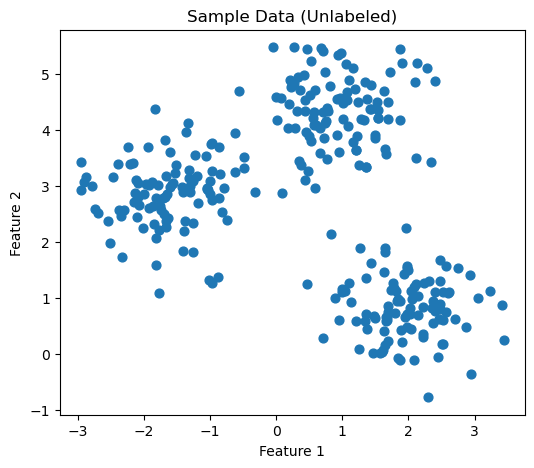

In [2]:
# Create synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=40)
plt.title("Sample Data (Unlabeled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


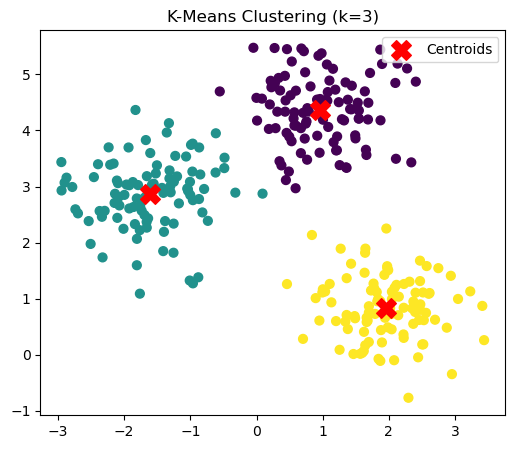

In [3]:
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster assignments
y_kmeans = kmeans.predict(X)

# Plot clustered data
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=3)")
plt.legend()
plt.show()


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

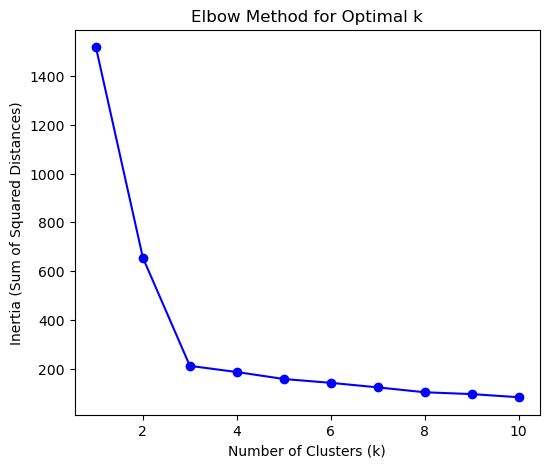

In [6]:
inertias = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)  # Sum of squared distances to cluster centers

plt.figure(figsize=(6,5))
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [8]:
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=2, Silhouette Score=0.553


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=3, Silhouette Score=0.660
k=4, Silhouette Score=0.522
k=5, Silhouette Score=0.446


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=6, Silhouette Score=0.447


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\tanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


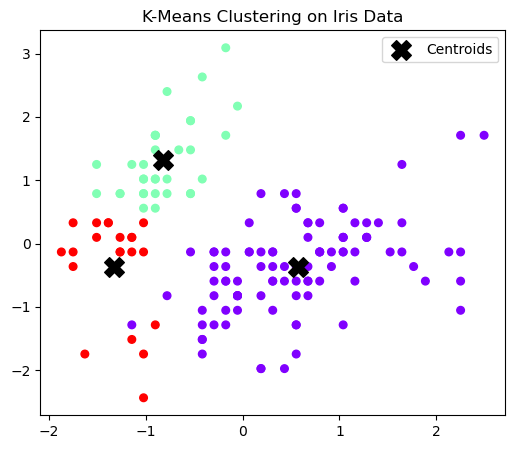

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

kmeans_iris = KMeans(n_clusters=3, random_state=42)
y_iris_kmeans = kmeans_iris.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_iris_kmeans, cmap='rainbow', s=30)
plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering on Iris Data")
plt.legend()
plt.show()


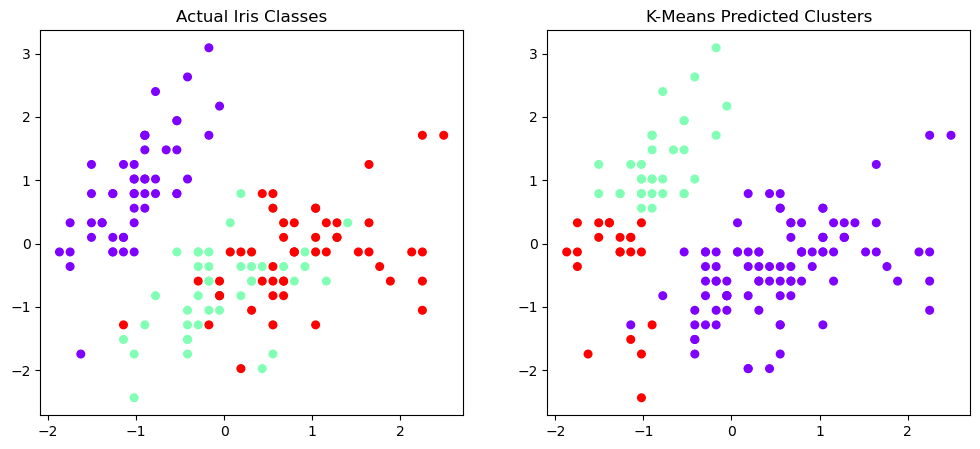

In [10]:
# Not for scoring, just for visual understanding
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=iris.target, cmap='rainbow', s=30)
plt.title("Actual Iris Classes")

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_iris_kmeans, cmap='rainbow', s=30)
plt.title("K-Means Predicted Clusters")

plt.show()


## How K-Means Works

K-Means tries to divide the data into **K clusters** such that:
- Each data point belongs to the nearest **centroid**
- Centroids are updated iteratively to minimize within-cluster variance

###  Algorithm Steps:
1. Choose number of clusters, `k`
2. Randomly initialize `k` centroids
3. Assign each data point to the nearest centroid
4. Recalculate centroids as mean of assigned points
5. Repeat steps 3–4 until convergence

###  Objective:
Minimize **Inertia** (within-cluster sum of squares).

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

---

###  Key Parameters:
| Parameter | Description |
|------------|--------------|
| `n_clusters` | Number of clusters (k) |
| `init` | Initialization method (default: ‘k-means++’) |
| `max_iter` | Max number of iterations |
| `n_init` | How many times to run with different initializations |
